<div class="warning" style='background-color:#AEC6CF; color: #000435; border-left: solid #003e87 10px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>ĐỒ ÁN CUỐI KỲ</b>
<p style='margin-top:1em; text-align:center'>
<b>CSC17104 - Lập trình cho Khoa học Dữ liệu, 21KHDL1</b></p>
<p style='margin-left:1em;'>

**Thành viên thực hiện:**
- 21127612 - Nguyễn Khánh Hoàng ('nkhoang21@clc.fitus.edu.vn')
- 21127423 - Trần Hiếu Tâm ('thtam21@clc.fitus.edu.vn')

**Tên đề tài:** Phân tích mức lương của Lập trình viên trên toàn cầu, giai đoạn 2021-2023 <br><br>
</p>
</p></span>
</div>

**<h1><center>Phần 3-4: Tiền xử lý, phân tích dữ liệu và đưa ra, trả lời các câu hỏi để giải quyết vấn đề</center></h1>**

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; font-family:arial; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục</b></h3>
    
   * [Câu hỏi 1: Ảnh hưởng của đại dịch Covid-19 đối với toàn ngành Công nghệ Thông tin trên toàn cầu diễn ra ở mức độ như thế nào?](#1)
   * [Câu hỏi 2: Bằng cấp của lập trình viên có mang lại thu nhập cao hơn ở mọi vị trí công việc trong ngành hay không? ](#2)
   * [Câu hỏi 3: Sự khác biệt về mức độ sử dụng phương pháp phát triển phần mềm giữa các nhà phát triển tại các công ty khởi nghiệp so với các công ty lớn ở mức độ như thế nào?](#3)

### **Các thư viện cần thiết**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Import dữ liệu đã được xử lý**

In [2]:
df_new = pd.read_csv('./Data/processed_data.csv')

<a id="1"></a>

#### <div style="text-align: left; background-color:#003e87; font-family:arial;color: white; padding: 14px; line-height: 1;font-weight: bold; border-radius:10px">Câu hỏi 1: Ảnh hưởng của đại dịch Covid-19 và suy thoái kinh tế 2023 đối với toàn ngành Công nghệ Thông tin trên toàn cầu diễn ra ở mức độ như thế nào? </div>


#### **<font color = #E7B10A> 🔍Giá trị có thể đạt được:** </font>

- Giúp nguồn nhân lực ngành Công nghệ Thông tin có cái nhìn tổng quan và thuyết phục về thị trường trong ngành trên toàn cầu trước, trong và sau đại dịch Covid-19. Từ đó có kế hoạch học tập, làm việc, nâng cao tay nghề phù hợp trước xu thế cạnh tranh mới trong ngành sau dịch.  
- Cung cấp trực quan những tích cực, tiêu cực mà Covid và suy thoái kinh tế đã mang đến, trong đó tập trung vào phân tích về mức lương, tỷ lệ thất nghiệp và xu hướng làm việc online sau đại dịch

#### **<font color = #E7B10A> 🔍Ý tưởng thực hiện:** </font>

- Phân tích về mức lương qua các năm, được phân loại theo ngành nghề
- Phân tích về tỷ lệ thất nghiệp qua các năm
- Phân tích xu hướng làm việc từ xa các năm sau đại dịch

#### **<font color = #E7B10A> 🔍1.1 Phân tích về mức lương** </font>

- Việc phân tích về mức lương qua các năm sẽ xoay quanh ba trường: `DevType`, `ConvertedCompYearly` và `Year`
- Đầu tiên, nhóm cần tiền xử lý dữ liệu. Với việc xử lý mất mát dữ liệu, nhóm không dùng phương pháp điền dữ liệu còn trống (fill) do có thể ảnh hưởng đến kết quả sau cùng, thay vào đó, nhóm dẽ lọc bỏ các dòng có bất cứ dữ liệu trống nào

In [ ]:
selected_cols=['DevType','ConvertedCompYearly','Year']

comp_df=df_new[selected_cols]
comp_df=comp_df.dropna(subset=['DevType','ConvertedCompYearly'],how='any')

- Để thực hiện việc xử lý, trước hết nhóm cần tách trường `DevType` thành dạng thích hợp, do trường này được tạo bởi câu hỏi dạng Multiple choice questions with multi-select answers, cụ thể:
    1. Nhóm sẽ thực hiện việc tách trường DevType. Ứng với mỗi dòng, nhóm sẽ tách mỗi loại công việc của người đó ra thành nhiều cột tương ứng
    2. Sau đó, nhóm sẽ biến đổi DataFrame từ dạng rộng (có nhiều cột biểu thị công việc) thành dạng cao (có nhiều dòng biểu thị công việc)
    3. Cuối cùng, nhóm thực hiện việc gom nhóm dữ liệu theo năm và ngành nghề, tính trung bình trên đó để thấy được sự thay đổi của mức lương trong và sau dịch Covid
    4. Ở đây, do số lượng ngành nghề rất nhiều, nhóm chỉ lấy ra một vài ngành nghề nhóm cảm thấy phổ biến ở Việt Nam, được nhiều người quan tâm (theo quan điểm của nhóm)
    5. Với dữ liệu trên, nhóm vẽ ra biểu đồ đường để thấy được xu hướng lương qua các năm

In [ ]:
devtype_df=comp_df['DevType'].str.split(';',expand=True)
comp_df=pd.concat([comp_df[['ConvertedCompYearly','Year']],devtype_df],axis=1)

melted_df=comp_df.melt(id_vars=['Year','ConvertedCompYearly'],value_name='DevType')
melted_df=melted_df.drop('variable',axis=1)
# Filter for which dev type you care about
filtered_mask=['Developer, front-end','Developer, full-stack','DevOps specialist','Data or business analyst','Data scientist or machine learning specialist']
melted_df=melted_df[melted_df['DevType'].isin(filtered_mask)]
grouped_df=melted_df.groupby(['Year', 'DevType']).mean()

grouped_df


In [ ]:
grouped_df.reset_index(inplace=True)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")
sns.lineplot(x='Year', y='ConvertedCompYearly', hue='DevType', data=grouped_df, marker='o',palette='Set2')

plt.title('Average Converted Compensation Over the Years by Developer Type')
plt.xlabel('Year')
plt.ylabel('Average Converted Compensation (Yearly)')

# Formatting the x-axis to display only integers (years)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

- Có thể thấy, năm 2022, khi các nước bắt đầu sống chung với dịch, mức lương tại các ngành nghề tăng lên rõ rệt. Nhưng sang năm 2023, làn sống "layoff" bắt đầu ở ngành Công nghệ Thông tin, kết hợp với suy thoái kinh tế nên mức lương lại tụt giảm đáng kể.
- Với biểu đồ trên, ta cũng thấy được sự phát triển của khoa học dữ liệu, hay cụ thể hơn là về lĩnh vực AI, học máy, với việc mức lương của chuyên gia khoa học dữ liệu, học máy là cao nhất so với các ngành nhóm đang khảo sát

#### **<font color = #E7B10A> 🔍1.2 Phân tích về tỷ lệ thất nghiệp** </font>


- Sau khi có cái nhìn chi tiết về mức lương, tiếp theo, nhóm sẽ phân tích về tỷ lệ thất nghiệp tại năm Covid hoành hành, năm ngành được phục hồi cũng như năm đối mặt với làn sóng layoff

- Việc phân tích tỷ lệ thất nghiệp sẽ xoay quanh ba trường `EdLevel`, `Employment`, `Year`
- Về việc xử lý dữ liệu mất mát, nhóm sẽ chuyển thành chuỗi `I prefer not to say` để dễ dàng thực hiện các thao tác của Pandas, cũng như giữ được ý nghĩa thực của nó
- Do bộ dữ liệu để phân tích được ghép từ 3 năm, vì vậy có một số điều chỉnh từ phía Stack Overflow khiến có một vài giá trị khác nhau nhưng lại giống nhau về mặt ý nghĩa, cụ thể ở đây, tại trường `EdLevel`, các năm 2021, 2022 có giá trị Professional degree(JD, MD) và Other doctoral degree(PhD, Ed.D etc...), trong khi năm 2023 được đổi thành Professional degree (JD, MD, PhD, Ed.D etc...), vì vậy, nhóm cũng sẽ điều chỉnh tất cả giá trị về Professional degree

In [ ]:
selected_cols=['EdLevel','Employment','Year']
status_df=df_new[selected_cols]
status_df=status_df.fillna("I prefer not to say")
status_df['EdLevel']=status_df['EdLevel'].replace(r'Professional degree \(.*\)', 'Professional degree', regex=True)
status_df['EdLevel']=status_df['EdLevel'].replace('Other doctoral degree (Ph.D., Ed.D., etc.)','Professional degree')

- Tiếp theo, nhóm tính tỷ lệ thất nghiệp theo trình độ học vấn của họ thông qua các bước sau:
    1. Sau khi tìm hiểu về lược đồ cuộc khảo sát, nhóm biết được có 2 trạng thái thất nghiệp: `Not employed, but looking for work` và `Not employed, and not looking for work`, vì vậy, nhóm sẽ tạo ra một DataFrame mới chỉ chứa các dòng về người thất nghiệp
    2. Như vậy, nhóm sẽ có 2 DataFrame, một cho tất cả thông tin và 1 chỉ cho thông tin về người thất nghiệp. Nhóm sẽ đếm số lượng người mỗi bên, được gom nhóm theo trình độ học vấn và theo năm, cuối cùng chia ra để có được tỷ lệ thất nghiệp ứng với trình độ học vấn qua từng năm
    3. Để trực quan hơn, nhóm cũng sẽ biểu thị lên biểu đồ đường như trên

In [ ]:


unemployed_df=status_df[status_df['Employment'].str.contains('Not employed, but looking for work|Not employed, and not looking for work')]

grouped_unemployed_df=unemployed_df[unemployed_df['EdLevel']!='I prefer not to say'].groupby(['EdLevel','Year']).count()
grouped_df=status_df[status_df['EdLevel']!='I prefer not to say'].groupby(['EdLevel','Year']).count()

unemployment_rate_df=grouped_unemployed_df['Employment'] / grouped_df['Employment']*100
unemployment_rate_df

In [ ]:
unemployment_rate_df = unemployment_rate_df.unstack(level=0)

# Plotting
plt.figure(figsize=(20, 8))
unemployment_rate_df.plot(marker='o', linestyle='-', ax=plt.gca())

# Adding labels and title
plt.title('Unemployment Rate Over the Years by Education Level')
plt.ylabel('Unemployment Rate (%)')

# Set x-axis ticks to display only years
years = unemployment_rate_df.index.get_level_values('Year').unique()
plt.xticks(years, [str(int(year)) for year in years])

plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

- Có thể thấy, dịch Covid ảnh hưởng lớn đến tình trạng thất nghiệp của người lao động, đặc biệt là ở các bậc giáo dục thấp hơn Đại học, và xảy ra tương tự với năm 2022. Tại năm 2023, tỷ lệ thất nghiệp có xu hướng tăng nhẹ, duy chỉ có Something else được giảm mạnh. 

#### **<font color = #E7B10A> 🔍1.3 Phân tích về xu hướng làm việc remote** </font>


- Năm 2021, Covid bùng phát mạnh mẽ, buộc tất cả các ngành phải thực hiện các biện pháp an toàn như làm việc từ xa. Sang năm 2022, thế giới dần trở lại bình thường, duy chỉ có ngành Công nghệ Thông tin đã thực sự tiếp thu văn hóa làm việc từ xa đó và dần có xu hướng chuyển qua nó. Ở đây, nhóm sẽ phân tích về xu hướng làm việc từ xa vào năm 2022 và 2023

- Việc phân tích sẽ phụ thuộc vào hai trường `RemoteWork` và `Year`
- Trong phần tiền xử lý, nhóm sẽ điền các ô bị thiếu thành I prefer not to say, đồng thời cũng biến đổi các giá trị khác nhau ở năm 2022, 2023 nhưng giống nhau về ý nghĩa thành cùng một loại

In [ ]:
selected_cols=['RemoteWork','Year']
remote_status_df=df_new[selected_cols]
remote_status_df=remote_status_df[remote_status_df['Year']!=2021]
remote_status_df=remote_status_df.replace('Full in-person','In-person')
remote_status_df=remote_status_df.replace('Fully remote','Remote')
remote_status_df=remote_status_df.fillna('I prefer not to say')


- Để thống kê xu hướng làm việc remote, nhóm sẽ tính toán theo phần trăm lượng người làm việc hoàn toàn từ xa, hybrid và hoàn toàn làm việc trực tiếp qua các năm. Sau đó, nhóm sẽ vẽ biểu đồ cột cho việc so sánh 2 năm đó

In [ ]:
grouped_df=remote_status_df.groupby(['Year'])

grouped_df.value_counts(normalize=True)

In [ ]:
percentage_2022=grouped_df.get_group(2022).value_counts(normalize=True)

percentage_2023=grouped_df.get_group(2023).value_counts(normalize=True)

percentage_df_2022 = pd.DataFrame(percentage_2022)
percentage_df_2023 = pd.DataFrame(percentage_2023)


In [ ]:
width = 0.35  
ind = np.arange(len(percentage_df_2022)) 

fig, ax = plt.subplots(figsize=(20, 6))

bar1 = ax.bar(ind, percentage_df_2022['proportion'], width, label='2022', color='skyblue')
bar2 = ax.bar(ind + width, percentage_df_2023['proportion'], width, label='2023', color='orange')

ax.set_title('Percentage Distribution of RemoteWork Status in 2022 and 2023')
ax.set_xlabel('RemoteWork Status')
ax.set_ylabel('Percentage')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(percentage_df_2022.index.get_level_values(0), rotation='vertical') 
ax.legend()

plt.show()

- Như vậy, tỷ lệ không thay đổi quá nhiều, lượng người làm việc trực tiếp tăng lên một ít, nhưng qua biểu đồ trên, ta cũng thấy được ngành Công nghệ Thông tin đang có xu hướng dần chuyển qua làm việc từ xa, khi tỷ lệ làm từ xa hoàn toàn chiếm gần 35%, và làm hybrid cũng vậy

<a id="2"></a>

#### <div style="text-align: left; background-color:#003e87; font-family:arial;color: white; padding: 14px; line-height: 1;font-weight: bold; border-radius:10px">Câu hỏi 2: Bằng cấp của lập trình viên có mang lại thu nhập cao hơn ở mọi vị trí công việc trong ngành hay không? </div>


#### **<font color = #E7B10A> 🔍Giá trị có thể đạt được:** </font>

- Vấn đề trên được đưa ra nhằm mục đích phân tích nguồn dữ liệu khách quan để có căn cứ giúp nguồn nhân lực chất lượng cao của ngành Công nghệ Thông tin có thể tự tin nâng cao tay nghề, tiếp tục học ở các bậc cao hơn trong các lĩnh vực phù hợp với bản thân để tăng thêm thu nhập, đóng góp nguồn chất xám chất lượng cho các sản phẩm công nghệ. 
- Việc nắm bắt được mối quan hệ giữa bằng cấp và thu nhập có thể giúp Lập trình viên có định hướng học tập và làm việc phù hợp với khả năng và kỳ vọng của bản thân (về mức lương cao, đãi ngộ tốt, hướng đến làm việc trong môi trường nghiên cứu học thuật chuyên nghiệp phù hợp,...)
- Các công ty, tổ chức, tập đoàn công nghệ có căn cứ để đưa ra chỉ tiêu tuyển dụng, đãi ngộ phù hợp với vị trí, yêu cầu công việc và thị trường nhân lực. 

#### **<font color = #E7B10A> 🔍Ý tưởng thực hiện:** </font>

- Tính tỉ lệ bằng cấp trong thị trường lao động ngành Công nghệ Thông tin. Sử dụng biểu đồ tròn để trực quan hóa kết quả đạt được. 
- Thu nhập trung bình theo bằng cấp là bao nhiêu, phân bố như thế nào. Trực quan hóa bằng biểu đồ để có cái nhìn tổng quan.
- Tính tỉ lệ phần trăm người có các loại bằng cấp ở mỗi vị trí `DevType`. Trực quan hóa bằng biểu đồ và quan sát xem những vị trí nào có nhiều bằng Tiến sĩ (Professional degree), những vị trí nào có ít bằng Tiến sĩ (Professional degree)
- Chọn ra top 4 vị trí có tỉ lệ bằng Tiến sĩ (Professional degree) cao nhất, so sánh thu nhập trung bình theo bằng cấp để xem liệu lương học từ Cử nhân trở lên có lệch nhiều so với các bằng khác hay không.
- Tương tự ý 2.4 nhưng với top 4 vị trí có tỉ lệ bằng Tiến sĩ (Professional degree) thấp nhất.

Câu hỏi đưa ra có liên quan đến 3 trường thông tin chính sau: `EdLevel`, `ConvertedCompYearly` và `DevType`. Đối với các dòng dữ liệu bị khuyết 1 trong 3 thông tin trên, nhóm không dùng phương pháp điền dữ liệu còn trống (fill) do có thể ảnh hưởng đến kết quả sau cùng, thay vào đó, nhóm dẽ lọc bỏ các dòng có bất cứ dữ liệu trống nào. 


In [3]:
df_edu = df_new[['EdLevel', 'ConvertedCompYearly', 'DevType']].dropna()

#### **<font color = #E7B10A> 🔍2.1 Tính tỉ lệ bằng cấp trong thị trường lao động ngành CNTT.** </font>

- Đối với trường dữ liệu `EdLevel`: Rút gọn tên các văn bằng để tạo thuận tiện trong quá trình theo dõi. Đồng thời đối với các dòng thông tin có dữ liệu `EdLevel` là `Something else` không đưa ra bằng cấp của người được khảo sát là gì, đạt ở mức độ nào nên không cung cấp được bất cứ giá trị gì trong câu hỏi này. Vì thế, cần xóa các dòng đó để thuận tiện hơn trong quá trình phân tích. 

In [4]:
# Rút gọn tên các văn bằng
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Other doctoral degree (Ph.D., Ed.D., etc.)', 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Professional degree (JD, MD, etc.)'], 'Professional deg')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'], 'Master')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'], 'Bachelor')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Some college/university study without earning a degree'], 'College study without deg')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Associate degree (A.A., A.S., etc.)'], 'Associate deg')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], 'Secondary school')
df_edu['EdLevel'] = df_edu['EdLevel'].replace(['Primary/elementary school'], 'Primary school')

# Loại bỏ dữ liệu 'Something else' trong cột thông tin văn bằng
df_edu = df_edu[df_edu['EdLevel'] != 'Something else']

- Tính tỉ lệ từng loại bằng cấp trong tổng thể thị trường lao động ngành Công nghệ Thông tin hiện nay. Sử dụng biểu đồ tròn để trực quan hóa kết quả đạt được. 

EdLevel
Bachelor                     47.991561
Master                       26.504996
College study without deg    12.047587
Professional deg              5.143340
Secondary school              4.552309
Associate deg                 3.238484
Primary school                0.521722
Name: proportion, dtype: float64


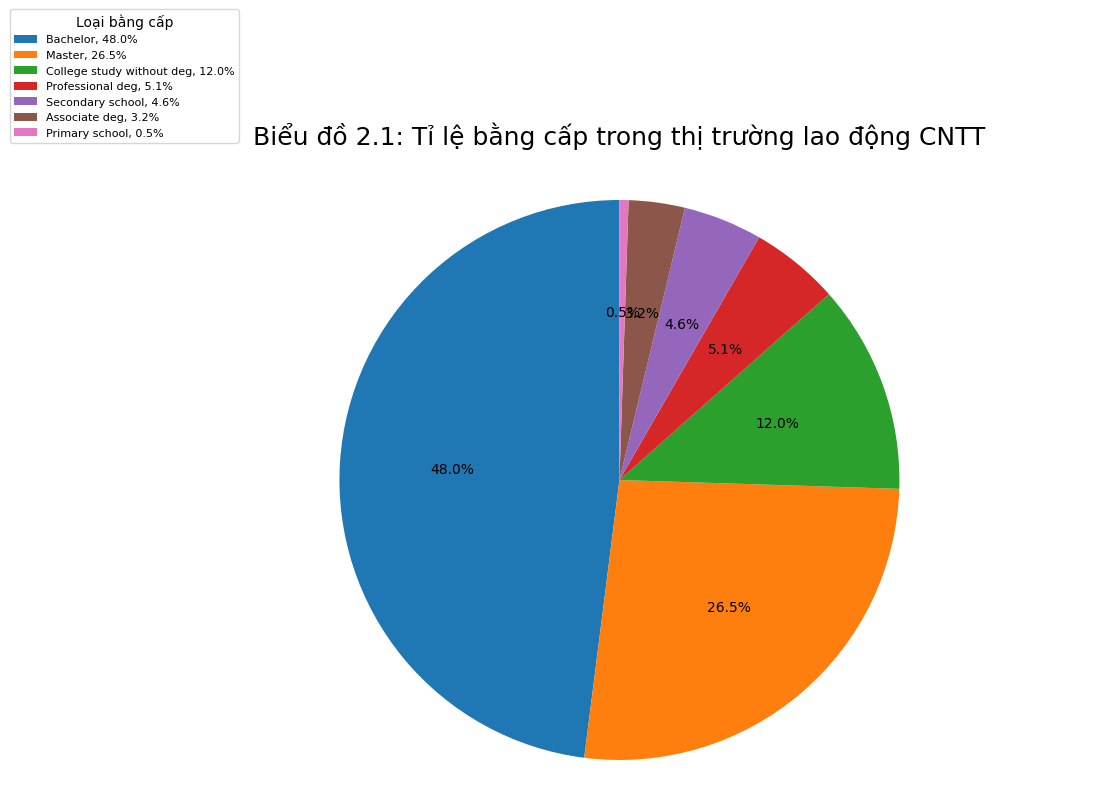

In [5]:
# In ra màn hình tỉ lệ từng loại văn bằng trong thị trường CNTT hiện nay
print(df_edu.EdLevel.value_counts(normalize=True) * 100)

# Trực quan hóa bằng biểu đồ tròn
fig, axs = plt.subplots(figsize=(12, 8))

# Get data
labels = df_edu.EdLevel.value_counts().index
sizes = df_edu.EdLevel.value_counts().values 

# Plotting the pie chart
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Biểu đồ 2.1: Tỉ lệ bằng cấp trong thị trường lao động CNTT', fontsize=18, pad=20)

total = sum(sizes)
legend = plt.legend(
    title = 'Loại bằng cấp',
    loc='center left',
    labels=['%s, %1.1f%%' % (
        l, (float(s)/ total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 8},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)

# Display the pie chart
plt.show()

<b>Nhận xét:</b> Nhìn chung, tỉ lệ tổng các văn bằng Cử nhân (Bachelor), Thạc sĩ (Master), Tiến sĩ (Professional deg) chiếm đa số cao, hơn 3/4. Điều đó cho thấy số lượng đa số áp đảo của Lập trình viên học bậc đại học, sau đại học trong thị trường lao động ngành Công nghệ thông tin hiện nay. Bậc học cao nhất trong đây là Tiến sĩ (Professional deg) chỉ chiếm tỉ lệ không cao (5.1%). Các bậc học còn lại không học đại học chiếm tỉ lệ nhỏ (dao động từ 0.5%-12%). 

#### **<font color = #E7B10A> 🔍2.2 Thu nhập trung bình theo bằng cấp là bao nhiêu, phân bố như thế nào.** </font>

- Gom nhóm theo `EdLevel` để tính giá trị trung bình và độ lệch chuẩn, sau đó sắp xếp giảm dần theo giá trị trung bình của `ConvertedCompYearly`
- Với dữ liệu trên, nhóm vẽ ra biểu đồ cột và biểu đồ boxplot để thể hiện tương quan mức lương theo bằng cấp, cũng như sự phân bố mức thu nhập (`ConvertedCompYearly`) theo bằng cấp (`EdLevel`).

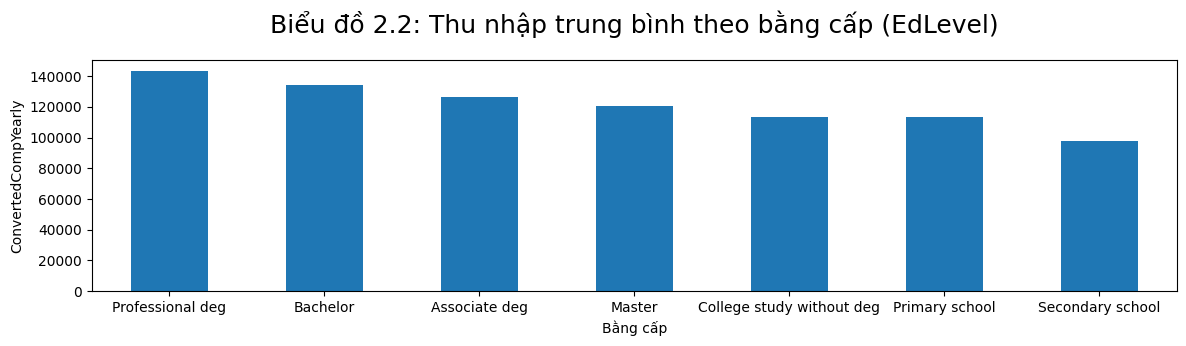

In [7]:
df_compen_by_edu = df_edu[['EdLevel', 'ConvertedCompYearly']].groupby('EdLevel').agg(['mean', 'std'])
df_compen_by_edu = df_compen_by_edu.sort_values(('ConvertedCompYearly', 'mean'), ascending=False)

df_compen_by_edu[('ConvertedCompYearly', 'mean')].plot.bar(figsize=(14, 3))
plt.xticks(rotation=0)
plt.xlabel('Bằng cấp')
plt.ylabel('ConvertedCompYearly')
plt.title('Biểu đồ 2.2: Thu nhập trung bình theo bằng cấp (EdLevel)', fontsize=18, pad=20);

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\1778270813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_edu, x='EdLevel', y='ConvertedCompYearly', showfliers=False, palette=sns.color_palette("husl", 7))


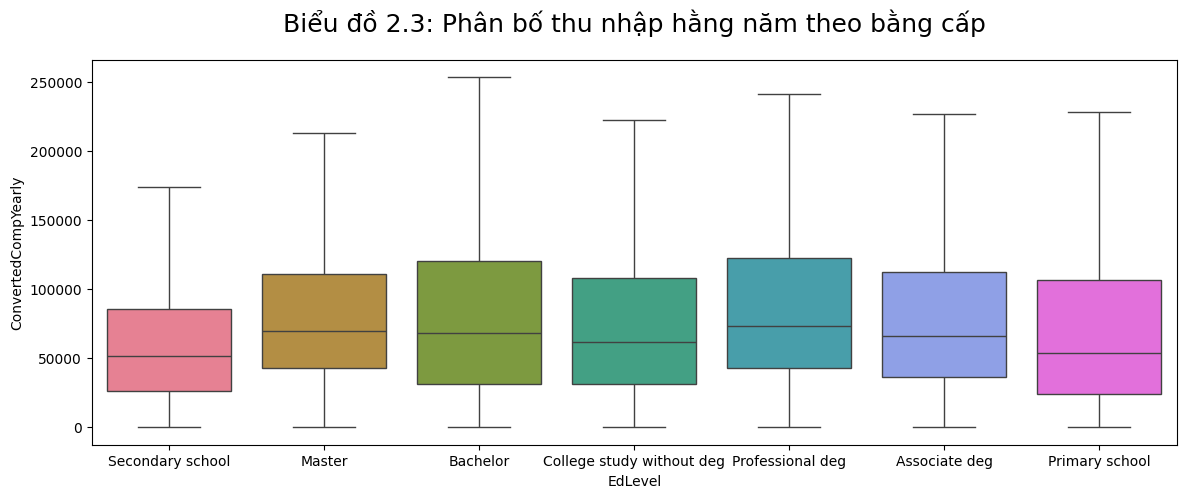

In [8]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_edu, x='EdLevel', y='ConvertedCompYearly', showfliers=False, palette=sns.color_palette("husl", 7))
plt.xlabel('EdLevel')
plt.ylabel('ConvertedCompYearly')
plt.title('Biểu đồ 2.3: Phân bố thu nhập hằng năm theo bằng cấp', fontsize=18, pad=20);

<b>Nhận xét:</b> Các loại bằng: Tiến sĩ (Professional deg) và Cử nhân (Bechelor) đều có mức lương 'nhỉnh hơn' so với mặt bằng chung, tuy nhiên lại có độ chênh lệch, phân bố lương rộng nhất. Bằng Tiến sĩ (Professional deg) dù chiếm tỉ lệ nhỏ nhưng có mức lương đạt cao nhất.

#### **<font color = #E7B10A> 🔍2.3 Tính tỉ lệ phần trăm người có các loại bằng cấp ở mỗi vị trí `DevType`.** </font>

- Đối với trường dữ liệu `DevType`, để thực hiện việc xử lý, trước hết nhóm cần tách trường `DevType` thành dạng thích hợp, do trường này được tạo bởi câu hỏi dạng Multiple choice questions with multi-select answers, cụ thể:
    1. Nhóm sẽ thực hiện việc tách trường `DevType`. Ứng với mỗi dòng, nhóm sẽ tách mỗi loại công việc của người đó ra thành nhiều cột tương ứng
    2. Sau đó, nhóm sẽ biến đổi DataFrame từ dạng rộng (có nhiều cột biểu thị công việc) thành dạng cao (có nhiều dòng biểu thị công việc)    

In [10]:
# Tách câu trả lời dạng 'Multiple choice questions with multi-select answers' ra thành nhiều cột tương ứng
df_devtype = df_edu['DevType'].str.split(';', expand=True)
df_devtype['EdLevel'] = df_edu['EdLevel']
df_devtype['ConvertedCompYearly'] = df_edu['ConvertedCompYearly']

# Biến đổi DataFrame từ dạng rộng (có nhiều cột biểu thị công việc) thành dạng cao (có nhiều dòng biểu thị công việc)
df_devtype_new = pd.melt(df_devtype, id_vars=['EdLevel', 'ConvertedCompYearly'], var_name='variable', value_name='NewDevType').drop(['variable'], axis=1).dropna()


- Tạo `df_temp` là danh sách số lượng các loại bằng cấp ở từng `New DevType` trong ngành công nghệ thông tin.
- Nhóm thực hiện việc gom nhóm dữ liệu theo `NewDevType` và `EdLevel`. Sau đó tính tỉ lệ phần trăm các loại bằng cấp trong từng vị trí công việc cụ thể ở trên. Sắp xếp giảm dần dựa trên bằng Tiến sĩ (Professional deg)


In [11]:
df_temp = df_devtype_new.groupby(['NewDevType', 'EdLevel']).size()
df_temp = df_temp.unstack().fillna(0)

df_percent = df_temp.apply(lambda col: col*100/df_temp.sum(axis=1))
df_percent = df_percent.sort_values('Professional deg', ascending=False)
df_percent = df_percent[["Professional deg", "Master", "Bachelor", "Associate deg", "College study without deg", "Primary school", "Secondary school"]]


- Trực quan hóa bằng biểu đồ dòng để đưa ra góc nhìn tổng quan về kết quả đạt được.  

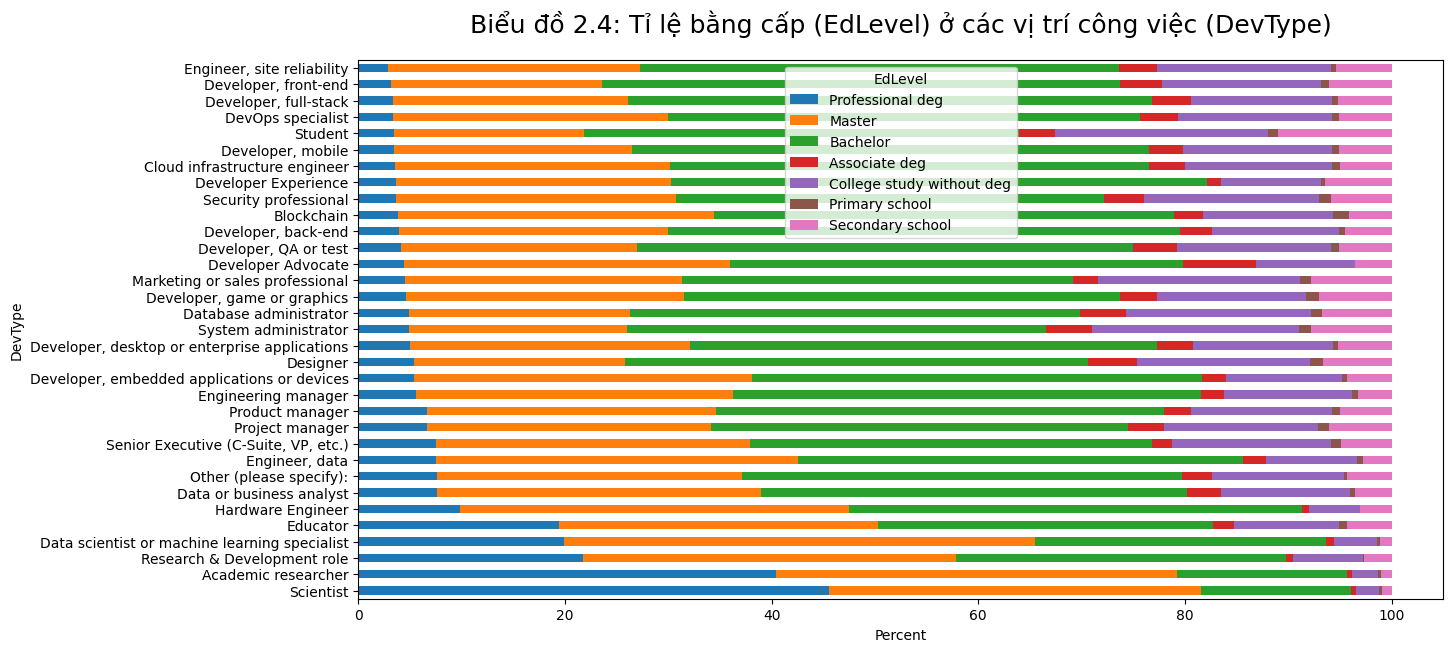

In [13]:
df_percent.plot(kind='barh', stacked=True, figsize=(14, 7))
plt.xlabel('Percent')
plt.ylabel('DevType')
plt.title('Biểu đồ 2.4: Tỉ lệ bằng cấp (EdLevel) ở các vị trí công việc (DevType)', fontsize=18, pad=20);

<b>Nhận xét:</b> Đối với các lĩnh vực cần hàm lượng kiến thức rộng, lớn, sâu, đòi hỏi đọc rất nhiều tài liệu nghiên cứu khoa học thì tỉ lệ tổng các bằng Tiến sĩ và Thạc sĩ chiếm tỉ lệ áp đảo (>= 50%), bao gồm các lĩnh vực, vị trí: Scientist, Academic researcher, Research & Devolopment role, Data scientist or ML specialist, Educator. Ở các lĩnh vực còn lại, dù không chiếm đa số nhưng tỉ lệ bằng từ Thạc sĩ trở lên đều dao động từ 25-49%, một tỉ lệ đáng chú ý. 

#### **<font color = #E7B10A> 🔍2.4 So sánh thu nhập trung bình theo bằng cấp trong top 4 vị trí có tỉ lệ bằng Tiến sĩ (Professional degree) cao nhất.** </font>

- Mỗi người khảo sát khi trả lời các câu hỏi về `ConvertedCompYearly` (mức lương) thì đã bao gồm lương của tất cả các vị trí công việc trong `NewDevType`. Vì thế, trong quá trình tiền xử lý, để đánh giá thu nhập ở từng vị trí công việc, nhóm sẽ chọn thống kê trên các dòng dữ liệu chỉ trả lời 1 `NewDevType` duy nhất. 
- Để thuận tiện đánh giá, so sánh giữa bậc đại học và không đại học, nhóm gộp các bằng 'College study without deg', 'Associate deg', 'Primary school', 'Secondary school' vào 'Other' 

In [22]:
df_devtype_salary = pd.melt(df_devtype[df_devtype[1].isna()], id_vars=['EdLevel', 'ConvertedCompYearly'], var_name='variable', value_name='NewDevType').drop(['variable'], axis=1).dropna()
df_devtype_salary['EdLevel'] = df_devtype_salary['EdLevel'].replace(['College study without deg', 'Associate deg', 'Primary school', 'Secondary school'], 'Other')


- Tìm ra 4 vị trị có tỉ lệ bằng Tiến sĩ cao nhất. Từ đó tính lương trung bình của từng loại bằng cấp ở 4 vị trí trên để tiến hành so sánh. Sử dụng biểu đồ cột để trực quan hóa kết quả đạt được. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\942487963.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="NewDevType", y="ConvertedCompYearly", hue="EdLevel", data=df_by_title_edu, ci=None)


Text(0.5, 1.0, 'Biểu đồ 2.6: Thu nhập trung bình theo bằng cấp của top 4 vị trí có tỉ lệ PhD cao nhất')

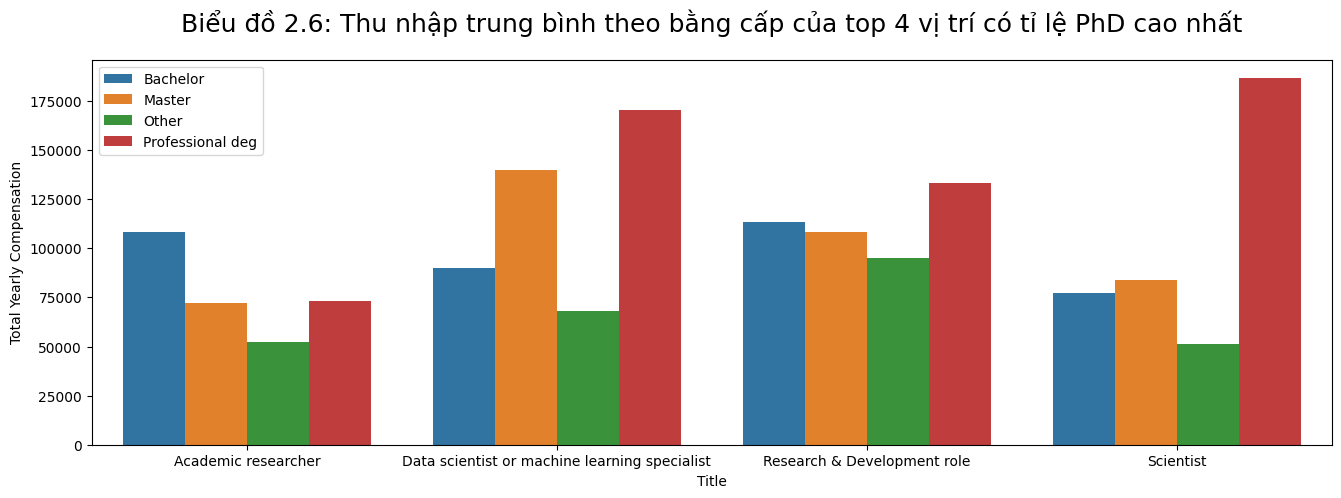

In [23]:
# Tìm ra 4 vị trí có tỉ lệ bằng cấp Tiến sĩ (Professional deg) cao nhất
df_percentage = df_percent.sort_values('Professional deg', ascending=False)
top_phd_title = df_percentage.index[:4].values

# Thống kê mức lương trung bình của từng loại bằng cấp ở 4 vị trí trên
df_temp = df_devtype_salary[df_devtype_salary.NewDevType.isin(top_phd_title)]
df_by_title_edu = df_temp.groupby(['NewDevType', 'EdLevel'])[['ConvertedCompYearly']].mean()
df_top_phd_compen = df_by_title_edu.unstack()
df_top_phd_compen.fillna(0, inplace=True)

# Vẽ biểu đồ cột để trực quan hóa dữ liệu
df_by_title_edu = df_by_title_edu.reset_index()

plt.figure(figsize=(16, 5))
sns.barplot(x="NewDevType", y="ConvertedCompYearly", hue="EdLevel", data=df_by_title_edu, ci=None)
plt.legend(facecolor='white')
plt.xlabel('Title')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 2.6: Thu nhập trung bình theo bằng cấp của top 4 vị trí có tỉ lệ PhD cao nhất', fontsize=18, pad=20)

<b>Nhận xét:</b> Các ngành có tỉ lệ bằng Tiến sĩ đạt top đầu này đòi hỏi hàm lượng kiến thức hàn lâm và khoa học để phục vụ cho việc nghiên cứu. Vì thế, cũng cho ra mức lương cao xứng đáng tương ứng. Đồng thời, mức lương cũng có sự chênh lệch khá lớn giữa bằng Tiến sĩ với các bằng còn lại. 

#### **<font color = #E7B10A> 🔍2.5 So sánh thu nhập trung bình theo bằng cấp trong top 4 vị trí có tỉ lệ bằng Tiến sĩ (Professional degree) thấp nhất.** </font>

- Tìm ra 4 vị trị có tỉ lệ bằng Tiến sĩ thấp nhất. Từ đó tính lương trung bình của từng loại bằng cấp ở 4 vị trí trên để tiến hành so sánh. Sử dụng biểu đồ cột để trực quan hóa kết quả đạt được. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2938693781.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="NewDevType", y="ConvertedCompYearly", hue="EdLevel", data=df_by_title_edu, ci=None)


Text(0.5, 1.0, 'Biểu đồ 2.7: Thu nhập trung bình theo bằng cấp của top 4 vị trí có tỉ lệ PhD thấp nhất')

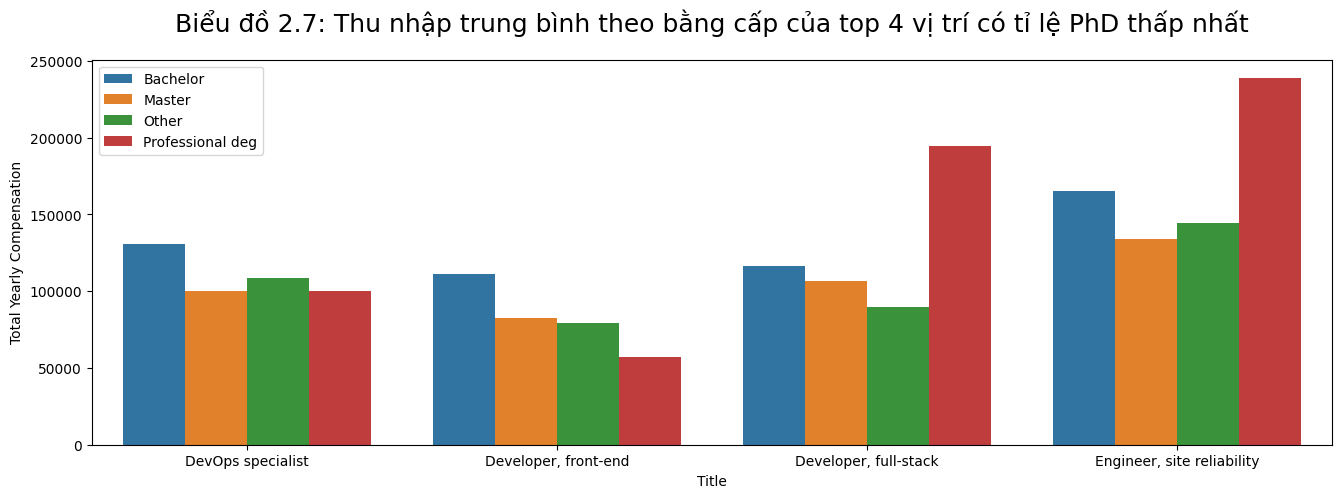

In [24]:
# Tìm ra 4 vị trí có tỉ lệ bằng cấp Tiến sĩ (Professional deg) thấp nhất
df_percentage = df_percent.sort_values('Professional deg', ascending=True)
top_phd_title = df_percentage.index[:4].values

# Thống kê mức lương trung bình của từng loại bằng cấp ở 4 vị trí trên
df_temp = df_devtype_salary[df_devtype_salary.NewDevType.isin(top_phd_title)]
df_by_title_edu = df_temp.groupby(['NewDevType', 'EdLevel'])[['ConvertedCompYearly']].mean()
df_top_phd_compen = df_by_title_edu.unstack()
df_top_phd_compen.fillna(0, inplace=True)

# Vẽ biểu đồ cột để trực quan hóa dữ liệu
df_by_title_edu = df_by_title_edu.reset_index()

plt.figure(figsize=(16, 5))
sns.barplot(x="NewDevType", y="ConvertedCompYearly", hue="EdLevel", data=df_by_title_edu, ci=None)
plt.legend(facecolor='white')
plt.xlabel('Title')
plt.ylabel('Total Yearly Compensation')
plt.title('Biểu đồ 2.7: Thu nhập trung bình theo bằng cấp của top 4 vị trí có tỉ lệ PhD thấp nhất', fontsize=18, pad=20)

<b>Nhận xét:</b> Các ngành có tỉ lệ bằng Tiến sĩ đạt thấp nhất này đòi hỏi sự tương tác với khách hàng nhiều, yêu cầu kĩ năng mềm và một số kỹ năng khác nên một số ngành thì bằng Tiến sĩ đạt mức lương chưa cao. Nhưng ở một số ngành khác, bằng Tiến sĩ vẫn có mức lương cao rõ rệt so với các loại bằng cấp còn lại. 

<b>Đánh giá kết quả đạt được:</b>
- Nhìn chung, mặt bằng nhân lực ngành Công nghệ thông tin hiện nay đại đa số đều có bằng Cử nhân trở lên, chiếm tỉ lệ rất cao. 
- Đối với từng vị trí công việc có sự dao động về tỉ lệ các loại bằng cấp. Tuy nhiên, cơ hội việc của tất cả vị trí đều đa số dành cho bằng Cử nhân trở lên (đa số từ 60-70% trở lên). 
- Dù đặc thù công việc khác nhau, song ở mức lương của tất cả vị trí công việc đều cho thấy việc có tấm bằng Đại học trở lên sẽ có thuận lợi lớn trong việc đạt mức lương cao hơn so với các bằng cấp khác. 
- <b>Kết luận:</b> Bằng cấp đạt được có ảnh hưởng lớn đến mức lương của nguồn nhân lực ngành Công nghệ thông tin cũng như cơ hội cạnh tranh, kiếm được việc làm ở các vị trí khác nhau. 

<a id="3"></a>

#### <div style="text-align: left; background-color:#003e87; font-family:arial;color: white; padding: 14px; line-height: 1;font-weight: bold; border-radius:10px">Câu hỏi 3: Sự khác biệt về mức độ sử dụng phương pháp phát triển phần mềm giữa các nhà phát triển tại các công ty khởi nghiệp so với các công ty lớn ở mức độ như thế nào?</div>

#### **<font color = #E7B10A> 🔍Giá trị có thể đạt được:** </font>

- Đưa ra bản phân tích từ dữ liệu khách quan nhằm giúp các công ty có thể chọn phương pháp phát triển phần mềm phù hợp với quy mô của công ty của mình, tăng lợi thế cạnh tranh. 
- Đồng thời, giúp lập trình viên có cái nhìn tổng quan về các phương pháp phát triển phần mềm trong ngành. Từ đó, có định hướng phát triển bản thân phù hợp theo kỳ vọng của bản thân. (Tham gia ở các công ty quy mô tương ứng, phù hợp với khả năng và mục tiêu cá nhân)

#### **<font color = #E7B10A> 🔍Ý tưởng thực hiện:** </font>

Dựa trên quy mô số nhân viên của 1 công ty, nhóm chia các công ty vào 3 nhóm: nhỏ, vừa và lớn. Nhóm sẽ thống kê mức độ thông dụng của các công nghệ ở từng nhóm công ty đó. Cụ thể ở từng nhóm công ty cần cho biết: 
- Top 6 `DatabaseHaveWorkedWith` được sử dụng nhiều nhất, và so sánh tỉ lệ sử dụng các công nghệ đó giữa các nhóm công ty.
- Top 6 `PlatformHaveWorkedWith` được sử dụng nhiều nhất, và so sánh tỉ lệ sử dụng các công nghệ đó giữa các nhóm công ty. 
- Top 6 `ToolsTechHaveWorkedWith` được sử dụng nhiều nhất, và so sánh tỉ lệ sử dụng các công nghệ đó giữa các nhóm công ty. 
- Top 6 `NEWCollabToolsHaveWorkedWith` được sử dụng nhiều nhất, và so sánh tỉ lệ sử dụng các công nghệ đó giữa các nhóm công ty. 

#### **<font color = #E7B10A> 🔍Tiền xử lý và các hàm sử dụng chung:** </font>

Câu hỏi đưa ra có liên quan đến 5 trường thông tin chính sau: `OrgSize`, `DatabaseHaveWorkedWith`, `PlatformHaveWorkedWith`, `ToolsTechHaveWorkedWith`, và `NEWCollabToolsHaveWorkedWith`. Đối với các dòng dữ liệu bị khuyết 1 trong 5 thông tin trên, nhóm không dùng phương pháp điền dữ liệu còn trống (fill) do có thể ảnh hưởng đến kết quả sau cùng, thay vào đó, nhóm dẽ lọc bỏ các dòng có bất cứ dữ liệu trống nào. 
- Đối với `OrgSize` nhận phản hồi là 'Just me - I am a freelancer, sole proprietor, etc.' hoặc 'I don’t know' không cung cấp quy mô công ty để có sự so sánh nên nhóm sẽ loại bỏ các dòng thông tin không cần thiết này. 
- Nhóm sẽ phân loại quy mô nhân viên công ty `OrgSize` về 3 nhóm chính: `Smallsize`, `Midsize`, `Largesize`.

In [26]:
df_software = df_new[['OrgSize', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith']].dropna()

df_software = df_software[df_software['OrgSize'] != 'Just me - I am a freelancer, sole proprietor, etc.']
df_software = df_software[df_software['OrgSize'] != 'I don’t know']

df_software['OrgSize'] = df_software['OrgSize'].replace(['2 to 9 employees', '10 to 19 employees', '20 to 99 employees'], 'Smallsize')
df_software['OrgSize'] = df_software['OrgSize'].replace(['100 to 499 employees', '500 to 999 employees'], 'Midsize')
df_software['OrgSize'] = df_software['OrgSize'].replace(['1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees'], 'Largesize')


Các hàm sử dụng chung: 
1. `extract_object`: Do 4 trường thông tin `DatabaseHaveWorkedWith`, `PlatformHaveWorkedWith`, `ToolsTechHaveWorkedWith`, và `NEWCollabToolsHaveWorkedWith` người được khảo sát có thể chọn nhiều câu trả lời. Vì thế, nhóm dùng hàm này để tách thông tin về dạng thích hợp. 
2. `convert_to_df`: Hàm dùng để trích suất top các công nghệ có vị trí cao nhất và lưu lại dưới dạng 1 Dataframe. 
3. `draw_lines_gragh`: Hàm dùng để vẽ biểu đồ đường để quan sát tổng quan tỉ lệ các công nghệ trong từng nhóm công ty. 

In [61]:
def extract_object(df, keyword):
    df_software_X = df[['OrgSize', keyword]]

    df_software_X = df_software_X[keyword].str.split(';', expand=True)
    df_software_X['OrgSize'] = df['OrgSize']

    df_software_X = pd.melt(df_software_X, id_vars=['OrgSize'], var_name='variable', value_name=keyword).drop(['variable'], axis=1).dropna()
    if (keyword == "PlatformHaveWorkedWith"): 
        df_software_X['PlatformHaveWorkedWith'] = df_software_X['PlatformHaveWorkedWith'].replace(['Amazon Web Services (AWS)', 'AWS'], 'AWS')

    return df_software_X[['OrgSize', keyword]].groupby('OrgSize').value_counts(normalize=True).unstack(fill_value=0) * 100

def convert_to_df(df_software_X, asc):
    d = {'Smallsize': pd.Series(df_software_X.T.Smallsize.sort_values(ascending=asc).values,
                      index=df_software_X.T.Smallsize.sort_values(ascending=asc).index),
     'Midsize': pd.Series(df_software_X.T.Midsize.sort_values(ascending=asc).values,
                      index=df_software_X.T.Midsize.sort_values(ascending=asc).index),
     'Largesize': pd.Series(df_software_X.T.Largesize.sort_values(ascending=asc).values,
                      index=df_software_X.T.Largesize.sort_values(ascending=asc).index)}
 
    return pd.DataFrame(d)

def draw_lines_gragh(df, top_rank, asc, id, name):
    # Sample data
    df_X = df.sort_values(by='Smallsize', ascending=asc).head(top_rank)#.Smallsize.sort_values(ascending=False).head(6)
    fig, ax = plt.subplots(figsize=(10, 4))

    x_values = df_X.columns
    line_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'cyan', 'gray']

    for i in range (0, df_X.shape[0]): 

        # Plotting the multi-line graph
        plt.plot(x_values, df_X.values[i], color=line_colors[i % 10], label=df_X.index[i])
        plt.scatter(x_values, df_X.values[i], color=line_colors[i % 10], marker='s')

    # Adding labels and title
    plt.xlabel('OrgSize')
    plt.ylabel('Percentage')
    plt.title('Đồ thị '+id+': Tỉ lệ các '+name+' trong các công ty nhỏ-vừa-lớn', fontsize=18, pad=20)


    legend = plt.legend(
        title = name,
        loc='best',
    )
    ax.set_yticklabels([f'{x:.0f}%' for x in ax.get_yticks()]) 


    # Displaying the graph
    plt.show()

#### **<font color = #E7B10A> 🔍3.1 `DatabaseHaveWorkedWith` ở các nhóm công ty.** </font>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2878858223.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0f}%' for x in ax.get_yticks()])


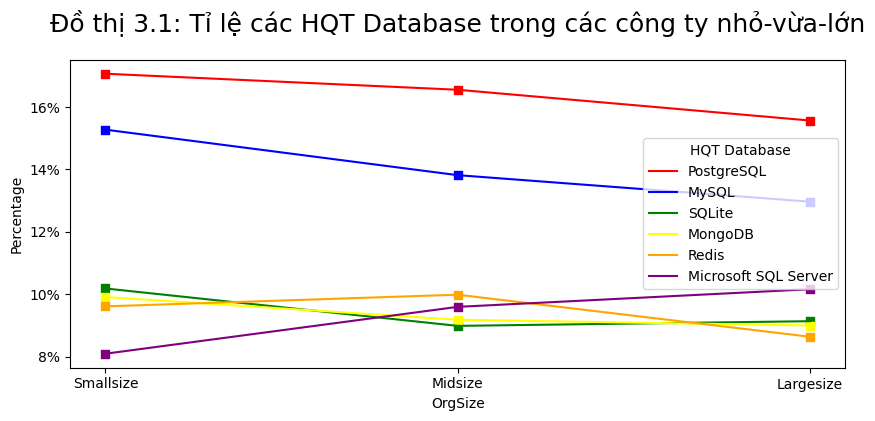

In [62]:
df_software_db = extract_object(df_software, 'DatabaseHaveWorkedWith')
top_rank = 6
asc = False
df_db = convert_to_df(df_software_db, asc)

draw_lines_gragh(df_db, top_rank, asc, '3.1', 'HQT Database')

<b>Nhận xét:</b> Kết quả trên cho thấy, dù làm việc ở các công ty quy mô khác nhau thì Hệ quản trị Cơ sở dữ liệu như PostgreSQL và MySQL đều có độ phổ biến cao. Điều đó cũng phù hợp với đặc điểm chung của 2 Hệ quản trị này: Có mã nguồn mở nên cho phép người dùng tự do sử dụng, chỉnh sửa và phân bổ theo nhiều hình thức. Vì thế nó cung cấp một môi trường linh hoạt và tiết kiệm chi phí cho các doanh nghiệp. Tuy nhiên ở các công ty quy mô càng lớn thì chi phí ban đầu không phải là khó khăn lớn nhất của họ, nên họ có thể lựa chọn sử dụng nhiều HQT khác. Vì thế, tỉ lệ của 2 HQT này ở nhóm công ty vừa và lớn có xu hướng giảm. 

#### **<font color = #E7B10A> 🔍3.2 `PlatformHaveWorkedWith` ở các nhóm công ty.** </font>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2878858223.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0f}%' for x in ax.get_yticks()])


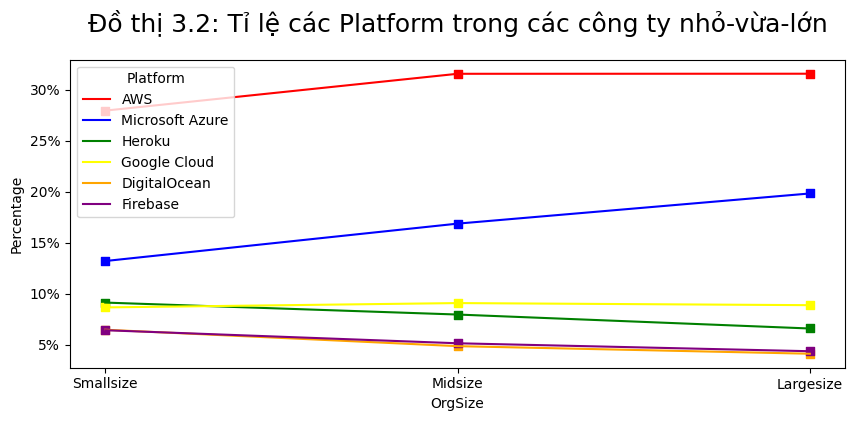

In [63]:
df_software_pf = extract_object(df_software, 'PlatformHaveWorkedWith')
top_rank = 6
asc = False
df_pf = convert_to_df(df_software_pf, asc)
draw_lines_gragh(df_pf, top_rank, asc, '3.2', 'Platform')

<b>Nhận xét:</b> AWS (27-30%) và Microsoft Azure (13-18%) chiếm tỉ lệ top đầu ở cả 3 nhóm công ty. 
- AWS có nhiều dịch vụ hơn và nhiều tính năng hơn trong các dịch vụ đó, hơn bất kỳ nhà cung cấp đám mây nào khác–từ các công nghệ cơ sở hạ tầng như máy tính, ổ lưu trữ và cơ sở dữ liệu–đến các công nghệ mới nổi, như machine learning và trí tuệ nhân tạo, kho dữ liệu và phân tích, và Internet of Things. Chính vì sự tiện lợi vượt trội đó so với các đối thủ nên AWS có độ phổ biển như trên. 
- Microsoft Azure có độ Linh hoạt và mở rộng cao, cung cấp nhiều dịch vụ khác nhau, có thể đáp ứng nhiều nhu cầu khác nhau của doanh nghiệp. Đồng thời với chi phí hợp lý, Azure tính phí theo mức sử dụng, giúp doanh nghiệp tiết kiệm nhiều chi phí trong quá trình làm việc.

#### **<font color = #E7B10A> 🔍3.3 `ToolsTechHaveWorkedWith` ở các nhóm công ty.** </font>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2878858223.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0f}%' for x in ax.get_yticks()])


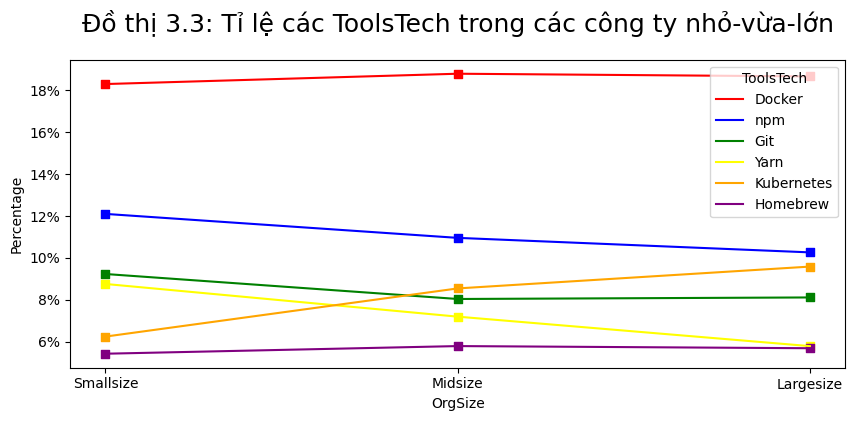

In [64]:
df_software_tt = extract_object(df_software, 'ToolsTechHaveWorkedWith')
top_rank = 6
asc = False
df_tt = convert_to_df(df_software_tt, asc)
draw_lines_gragh(df_tt, top_rank, asc, '3.3', 'ToolsTech')


<b>Nhận xét:</b> Docker chiếm tỉ lệ cao nhất. 


#### **<font color = #E7B10A> 🔍3.4 `NEWCollabToolsHaveWorkedWith` ở các nhóm công ty.** </font>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2878858223.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0f}%' for x in ax.get_yticks()])


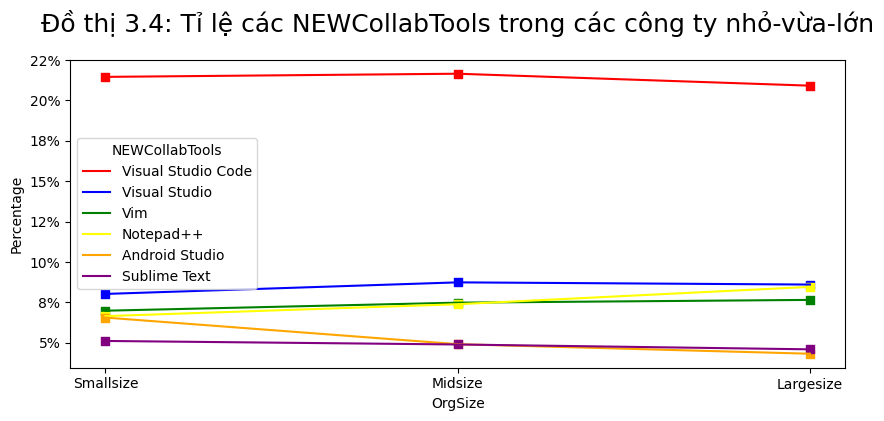

In [65]:
df_software_nct = extract_object(df_software, 'NEWCollabToolsHaveWorkedWith')
top_rank = 6
asc = False
df_nct = convert_to_df(df_software_nct, asc)
draw_lines_gragh(df_nct, top_rank, asc, '3.4', 'NEWCollabTools')